In [1]:
from QLearning import QLearning
from DQLearning import LinearDQNetwork, CNNDQNetwork, ReplayBuffer, ModelType, DQLearning
from typing import Tuple, List, Dict
from maze import Maze
from mdp import ActionType
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
def compare(maze_configs: List[Tuple[Tuple[int, int], int, int, float]],
            render_: bool = False,
            plot: bool = True,
            vwait: int = 0,
            cnn_num_nuorons: List[int] = [32, 64],
            linear_num_neurons: List[int] = [64, 128, 512]):
    
    accuracies: Dict[Tuple[Tuple[int, int], int, int, float], 
                     Dict[ModelType | QLearning, List[float]]] = {}

    for config in maze_configs:
        size, n_goals, n_fires, p = config
        maze = Maze(size[0], size[1], p, n_goals, n_fires, 75, 55)

        q_learning = QLearning(maze, 
                            actions=[ActionType.LEFT, ActionType.RIGHT,
                                     ActionType.UP, ActionType.DOWN], 
                            alpha=0.1,
                            render_=render_,
                            vwait=vwait)
        
        q_learning.train(10000, patience=50)
        ql_acc, _, _ = q_learning.evaluate(250)
        if config not in accuracies:
                accuracies[config] = {ModelType.CNN: [],
                                      ModelType.LINEAR: [],
                                      QLearning: []}
        accuracies[config][QLearning].append(ql_acc)

        for cnn_n in cnn_num_nuorons:
            dql_cnn = DQLearning(maze,
                                [ActionType.LEFT, ActionType.RIGHT,
                                ActionType.UP, ActionType.DOWN],
                                ModelType.CNN,
                                n_neuron=cnn_n,
                                learning_rate = 0.01,
                                discount_factor=0.9,
                                batch_size=64,
                                render_=render_,
                                vwait=0)
            
            dql_cnn.train(1500, plot=True, patience=15)
            dql_cnn.save_maze()
            cnn_acc, _, _ = dql_cnn.evaluate(250, render_)
            if config not in accuracies:
                accuracies[config] = {ModelType.CNN: [],
                                      ModelType.LINEAR: [],
                                      QLearning: []}
            accuracies[config][ModelType.CNN].append(cnn_acc)
            
        for linear_n in linear_num_neurons:
            maze = Maze(size[0], size[1], p, n_goals, n_fires, 75, 55)
    
            dql_linear = DQLearning(maze,
                                    [ActionType.LEFT, ActionType.RIGHT,
                                    ActionType.UP, ActionType.DOWN],
                                    ModelType.LINEAR,
                                    n_neuron=linear_n,
                                    learning_rate = 0.01,
                                    discount_factor=0.9,
                                    batch_size=64,
                                    render_=render_,
                                    vwait=0)
            
            dql_linear.train(2000, plot=True, patience=15)
            dql_linear.save_maze()

            linear_acc, _, _ = dql_linear.evaluate(250, render_=render_)
            if config not in accuracies:
                accuracies[config] = {ModelType.CNN: [],
                                      ModelType.LINEAR: [],
                                      QLearning: []}
            accuracies[config][ModelType.LINEAR].append(linear_acc)

    if plot:
        fig, axes = plt.subplots(len(maze_configs), 1, figsize=(10, len(maze_configs) * 5))
        if len(maze_configs) == 1:
            axes = [axes]

        for ax, config in zip(axes, maze_configs):
            size, n_goals, n_fires, p = config
            ax.set_title(f'Maze: {size}, Goals: {n_goals}, Fires: {n_fires}, Obstacles Proportion: {p}')
            ax.set_xlabel('Model')
            ax.set_ylabel('Accuracy')

            models = ['CNN', 'LINEAR', 'QLearning']
            cnn_accuracies = accuracies[config][ModelType.CNN]
            linear_accuracies = accuracies[config][ModelType.LINEAR]
            qlearning_accuracy = accuracies[config][QLearning]

            ax.boxplot([cnn_accuracies, linear_accuracies, qlearning_accuracy], labels=models, showmeans=True)
        
        plt.tight_layout()
        plt.show();

Training Started
------------------------------------------------------------------------------------------
Episode [0025], Completed in  20 steps, Training Reward -1.1400000000000001
Validation Accuracy: 15.00%, Validation Avg Reward: -0.22, Last 25 episodes runtime: 0.0390 (s)
------------------------------------------------------------------------------------------
Episode [0050], Completed in   9 steps, Training Reward -1.06
Validation Accuracy: 50.00%, Validation Avg Reward: 0.42, Last 25 episodes runtime: 0.0820 (s)
------------------------------------------------------------------------------------------
Episode [0075], Completed in  14 steps, Training Reward -1.09
Validation Accuracy: 55.00%, Validation Avg Reward: 0.33, Last 25 episodes runtime: 0.0410 (s)
------------------------------------------------------------------------------------------
Episode [0100], Completed in   2 steps, Training Reward 0.99
Validation Accuracy: 50.00%, Validation Avg Reward: 0.42, Last 25 episod

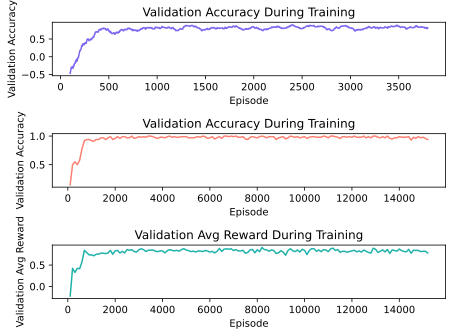

Evaluation Started
------------------------------------------------------------------------------------------
Episode 10/250 completed
Episode 20/250 completed
Episode 30/250 completed
Episode 40/250 completed
Episode 50/250 completed
Episode 60/250 completed
Episode 70/250 completed
Episode 80/250 completed
Episode 90/250 completed
Episode 100/250 completed
Episode 110/250 completed
Episode 120/250 completed
Episode 130/250 completed
Episode 140/250 completed
Episode 150/250 completed
Episode 160/250 completed
Episode 170/250 completed
Episode 180/250 completed
Episode 190/250 completed
Episode 200/250 completed
Episode 210/250 completed
Episode 220/250 completed
Episode 230/250 completed
Episode 240/250 completed
Episode 250/250 completed
Evaluation over 250 episodes:
Average Reward: 0.8247599999999999
Success Rate: 97.2%
Average Steps to Goal: 6.012
PolicyNet / TargetNet Model:
----------------------------------------------------------------
        Layer (type)               Output

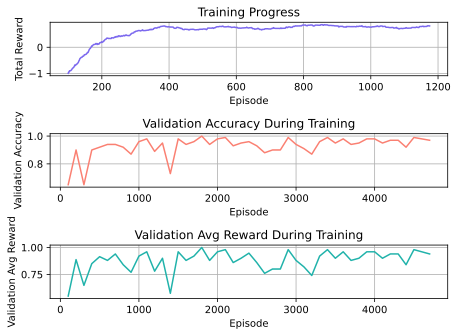

Maze saved to MazeLayouts\maze_5_5_20250119_223531.txt
Model saved to MazeLayouts\model_5_5_20250119_223531.pth
Evaluation Started (ModelType.CNN)
Evaluation over 250 episodes:
Average Reward: 0.8296800000000001
Success Rate: 95.6%
Average Steps to Goal: 4.724
PolicyNet / TargetNet Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [64, 16, 2, 2]             160
            Conv2d-2             [64, 32, 2, 2]           4,640
            Conv2d-3             [64, 64, 2, 2]          18,496
            Linear-4                   [64, 64]          16,448
            Linear-5                    [64, 4]             260
Total params: 40,004
Trainable params: 40,004
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.25
Params size (MB): 0.15
Estimated Total Size (MB): 0.41
-----------

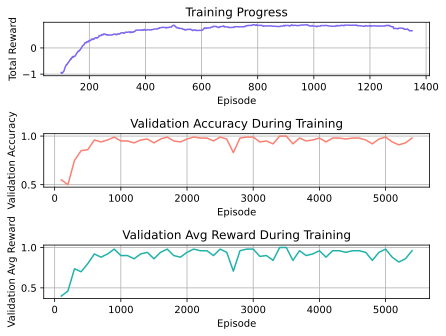

Maze saved to MazeLayouts\maze_5_5_20250119_223819.txt
Model saved to MazeLayouts\model_5_5_20250119_223819.pth
Evaluation Started (ModelType.CNN)
Evaluation over 250 episodes:
Average Reward: 0.7836
Success Rate: 92.4%
Average Steps to Goal: 4.472
PolicyNet / TargetNet Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 64]           1,664
            Linear-2                   [64, 64]           4,160
            Linear-3                    [64, 4]             260
Total params: 6,084
Trainable params: 6,084
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.02
Estimated Total Size (MB): 0.09
----------------------------------------------------------------
Training Started (ModelType.LINEAR)
----------------------------------------------------

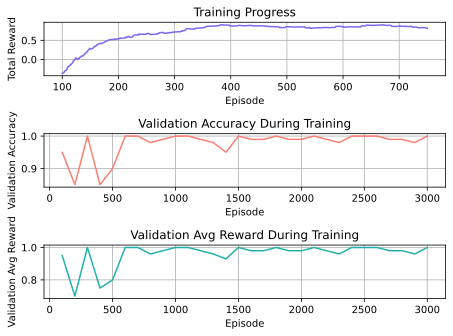

Maze saved to MazeLayouts\maze_5_5_20250119_223908.txt
Model saved to MazeLayouts\model_5_5_20250119_223908.pth
Evaluation Started (ModelType.LINEAR)
Evaluation over 250 episodes:
Average Reward: 0.9114800000000001
Success Rate: 100.0%
Average Steps to Goal: 5.376
PolicyNet / TargetNet Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [64, 128]           3,328
            Linear-2                  [64, 128]          16,512
            Linear-3                    [64, 4]             516
Total params: 20,356
Trainable params: 20,356
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.13
Params size (MB): 0.08
Estimated Total Size (MB): 0.21
----------------------------------------------------------------
Training Started (ModelType.LINEAR)
----------------------------------

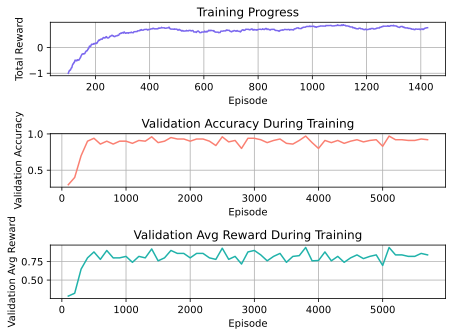

Maze saved to MazeLayouts\maze_5_5_20250119_224029.txt
Model saved to MazeLayouts\model_5_5_20250119_224029.pth
Evaluation Started (ModelType.LINEAR)
Evaluation over 250 episodes:
Average Reward: 0.6263399999999999
Success Rate: 84.8%
Average Steps to Goal: 3.76
PolicyNet / TargetNet Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [64, 512]          13,312
            Linear-2                  [64, 512]         262,656
            Linear-3                    [64, 4]           2,052
Total params: 278,020
Trainable params: 278,020
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.50
Params size (MB): 1.06
Estimated Total Size (MB): 1.57
----------------------------------------------------------------
Training Started (ModelType.LINEAR)
----------------------------------

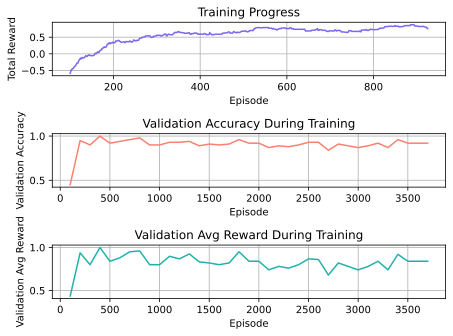

Maze saved to MazeLayouts\maze_5_5_20250119_224211.txt
Model saved to MazeLayouts\model_5_5_20250119_224211.pth
Evaluation Started (ModelType.LINEAR)
Evaluation over 250 episodes:
Average Reward: 0.77786
Success Rate: 92.80000000000001%
Average Steps to Goal: 3.496


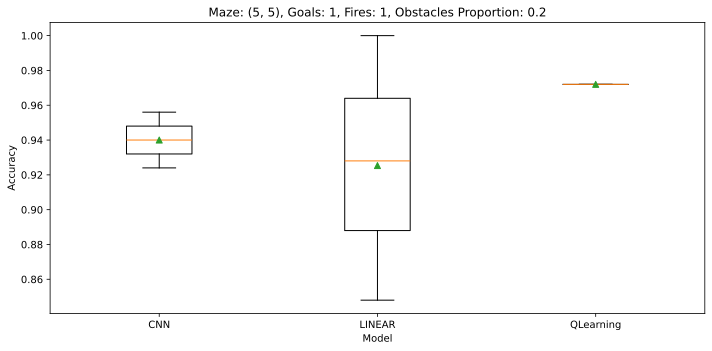

In [8]:
maze_configs = [((5, 5), 1, 1, 0.2)]
compare(maze_configs)